<a href="https://colab.research.google.com/github/NguyenTienThuann/AI_ST7/blob/main/FuzzyLogic_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=29ee4b6e6888148d7a63d998274ee08788f7ad8d4961b7526eae35da8ce41743
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


24.290427496094306


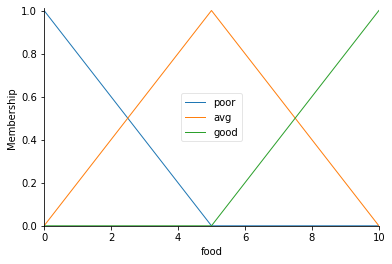

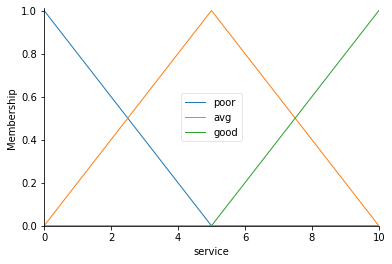

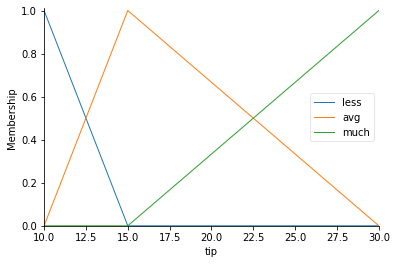

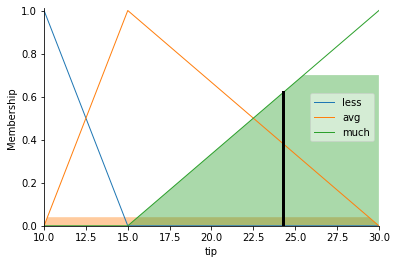

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['avg'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
food.view()

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['avg'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
service.view()

tip['less'] = fuzz.trimf(tip.universe,[10,10,15])
tip['avg'] = fuzz.trimf(tip.universe,[10,15,30])
tip['much'] = fuzz.trimf(tip.universe,[15,30,30])
tip.view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['avg'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['avg'])
rule4 = ctrl.Rule(food['avg']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['avg']&service['avg'],tip['avg'])
rule6 = ctrl.Rule(food['avg']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['avg'],tip['avg'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

50.0


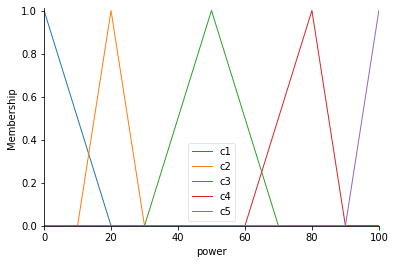

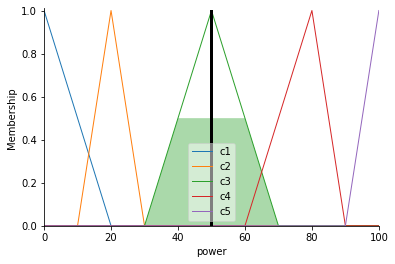

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,2000,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['vf'] = fuzz.trimf(time.universe,[10,30,80])
time['f'] = fuzz.trimf(time.universe,[60,80,100])
time['n'] = fuzz.trimf(time.universe,[90,120,150])
time['s'] = fuzz.trimf(time.universe,[130,160,170])
time['vs'] = fuzz.trimf(time.universe,[160,180,180])

rice['vl'] = fuzz.trimf(rice.universe,[100,150,500])
rice['l'] = fuzz.trimf(rice.universe,[300,500,800])
rice['n'] = fuzz.trimf(rice.universe,[800,1000,1300])
rice['m'] = fuzz.trimf(rice.universe,[1000,1500,1600])
rice['vm'] = fuzz.trimf(rice.universe,[1500,2000,2000])



power['c1'] = fuzz.trimf(power.universe,[0,0,20])
power['c2'] = fuzz.trimf(power.universe,[10,20,30])
power['c3'] = fuzz.trimf(power.universe,[30,50,70])
power['c4'] = fuzz.trimf(power.universe,[60,80,90])
power['c5'] = fuzz.trimf(power.universe,[90,100,100])

power.view()

rule1 = ctrl.Rule(time['vs']&rice['vl'],power['c1'])
rule2 = ctrl.Rule(time['vs']&rice['l'],power['c1'])
rule3 = ctrl.Rule(time['vs']&rice['n'],power['c2'])
rule4 = ctrl.Rule(time['vs']&rice['m'],power['c2'])
rule5 = ctrl.Rule(time['vs']&rice['vm'],power['c3'])

rule6 = ctrl.Rule(time['s']&rice['vl'],power['c1'])
rule7 = ctrl.Rule(time['s']&rice['l'],power['c2'])
rule8 = ctrl.Rule(time['s']&rice['n'],power['c3'])
rule9 = ctrl.Rule(time['s']&rice['m'],power['c3'])
rule10 = ctrl.Rule(time['s']&rice['vm'],power['c4'])

rule11 = ctrl.Rule(time['n']&rice['vl'],power['c2'])
rule12 = ctrl.Rule(time['n']&rice['l'],power['c2'])
rule13 = ctrl.Rule(time['n']&rice['n'],power['c3'])
rule14 = ctrl.Rule(time['n']&rice['m'],power['c3'])
rule15 = ctrl.Rule(time['n']&rice['vm'],power['c4'])

rule16 = ctrl.Rule(time['f']&rice['vl'],power['c2'])
rule17 = ctrl.Rule(time['f']&rice['l'],power['c2'])
rule18 = ctrl.Rule(time['f']&rice['n'],power['c3'])
rule19 = ctrl.Rule(time['f']&rice['m'],power['c4'])
rule20 = ctrl.Rule(time['f']&rice['vm'],power['c5'])

rule21 = ctrl.Rule(time['vf']&rice['vl'],power['c3'])
rule22 = ctrl.Rule(time['vf']&rice['l'],power['c3'])
rule23 = ctrl.Rule(time['vf']&rice['n'],power['c4'])
rule24 = ctrl.Rule(time['vf']&rice['m'],power['c5'])
rule25 = ctrl.Rule(time['vf']&rice['vm'],power['c5'])


powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 90
powering.input['rice'] = 900 
powering.compute()
print(powering.output['power'])
power.view(sim = powering)